# Sequence Alignment and Analysis

In this study, three protein sequences belonging to the cytochrome P450 family were aligned and analyzed. The identification numbers of these proteins are given by UniProt as follows: P08684, P10635, P11712. First, the sequences recorded in FASTA format were then checked for any problems or unusual situations within the sequence before alignment. In this way, the sequences were prepared for alignment. 3 protein sequences were aligned using pairwise alignment and the identity, similarity and difference of both sequences were analyzed and turned into output.

### Part 1: Sequence Retrieval and Pre-processing

In [1]:
import Bio
from Bio import Entrez, SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

sequences = [] #The sequences will be used to store as SeqRecord objects.
UniProt_IDs = ["P08684", "P10635", "P11712"]
Entrez.email = "d.onal2018@gtu.edu.tr"
for uniprot_id in UniProt_IDs:
    handle = Entrez.efetch(db="protein", id=uniprot_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank") #The captured information was read in genbank format
    handle.close() #Transaction closed
    
    sequence = record.seq #Sequence is taken from the captured information
    sequences.append(SeqRecord(sequence, id=uniprot_id, description="")) #SeqRecord object created and added to the list

# The resulting sequences were automatically saved in FASTA format
filename="Cytochrome_P450_sequences.fasta"
SeqIO.write(sequences, filename, "fasta")
print(f"Sequences saved to {filename}")

Sequences saved to Cytochrome_P450_sequences.fasta


The SeqIO module used here contains tools that manage the reading and writing operations of biological sequences. Using this module, SeqRecord objects can be written to a file in FASTA format. SeqRecord, on the other hand, can contain information about biological sequences. It may contain the id and certain definitions of the sequence. Seq is used to represent biological sequences.

In [2]:
for seq_record in sequences:
    #Checking whether there is any letter other than the standard amino acid in the sequence
    non_standard_aa = set(str(seq_record.seq)) - set("ACDEFGHIKLMNPQRSTVWY")
    if non_standard_aa:
        print(f"Warning: Non-standard amino acids found in {seq_record.id}: {non_standard_aa}")
    #Sequences length control
    if len(seq_record.seq) < 50:
        print(f"Warning: Sequence {seq_record.id} is unusually short ({len(seq_record.seq)} amino acids)")
print("Sequence pre-processing complete.")

Sequence pre-processing complete.


Amino acids are shown with letters. It was checked whether there were any letters other than these letters in the obtained amino acid sequences. Then, it was checked whether the sequence lengths were longer than 50. When these two conditions are met, the sequences are ready for alignment.

### Part 2: Pairwise Sequence Alignment


Alignment Result:
---MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPFLGNILSYHKGF-----
   .||.|       |...|...||.....|..........|||.|||.|||.|  |..|     
MGLEALVP-------LAVIVAIFLLLVDLMHRRQRWAARYPPGPLPLPGLGNLL--HVDFQNTPY 
CMFDMECHKKYGKVWGFYDGQQPVLAITDPDMIKTVLVKECYSVFTNRRP---------FGPVGF
| || ......|.|........||............||  .....|..||         |||   
C-FD-QLRRRFGDVFSLQLAWTPVVVLNGLAAVREALV--THGEDTADRPPVPITQILGFGP--- 
MKSAISIAE-DEEWKRLRSLLSPTFTS---GK-------LKEMVPIIAQYGDVLVRNLRREAETG
.......|. ...|...|.....|...   ||       ..|.....|....          ..|
RSQGVFLARYGPAWREQRRFSVSTLRNLGLGKKSLEQWVTEEAACLCAAFAN----------HSG 
KPVTLKDVFGAYSMDVITSTSFGVNIDSLNNPQDPFVENTKKLLRFDFLDPFFLSITVFP-----
.|.............||.|...|                    .||...||.||......     
RPFRPNGLLDKAVSNVIASLTCG--------------------RRFEYDDPRFLRLLDLAQEGLK 
----FL------IPILEVLNICVFPREVTNFLRKSVKRMKESRLEDTQKHRVD------------
    ||      .|.|  |.|......|..|.........|...|    ||..            
EESGFLREVLNAVPVL--LHIPALAGKVLRFQKAFLTQLDELLTE----HRMT

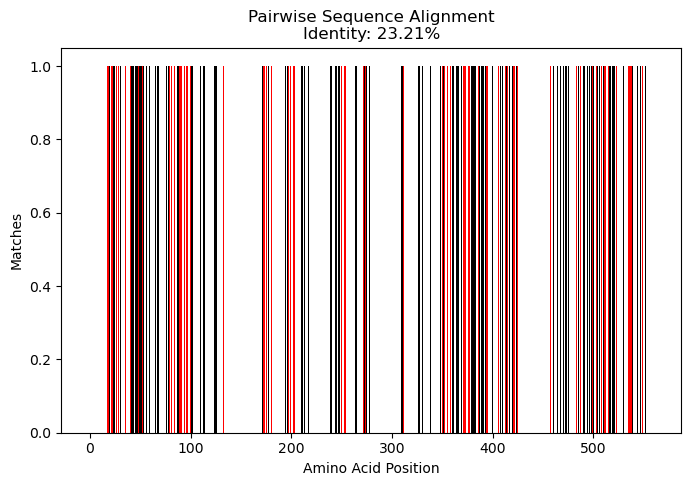


Alignment process completed.

Alignment Result:
MALIPDLAMETW--LLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPFLGNILSYH-KGFCMFDM
        |...  |.|..|..||......|.|..|.  .|||||||..||||... |.......
--------MDSLVVLVLCLSCLLLLSLWRQSSGRGKL--PPGPTPLPVIGNILQIGIKDISKSLT 
ECHKKYGKVWGFYDGQQPVLAITDPDMIKTVLVKECYSVFTNRRPFGPV------GFMKSAISIA
...|.||.|...|.|..|..........|..|. .....|..|..| |.      ||   .|...
NLSKVYGPVFTLYFGLKPIVVLHGYEAVKEALI-DLGEEFSGRGIF-PLAERANRGF---GIVFS 
EDEEWKRLR--SLLS-PTFTSGKLKEMVPIIAQYGDVLVRNLRREAETGKPVTLKDVFGAYSMDV
....||..|  ||.. ..|..|| .............||..||.  ....|.......|.....|
NGKKWKEIRRFSLMTLRNFGMGK-RSIEDRVQEEARCLVEELRK--TKASPCDPTFILGCAPCNV 
ITSTSFGVNIDSLNNPQDPFVENTKKLLRFDFLDPFFLSI------TVFPFLIPILEVLN-----
|.|..|.                    .|||..|..||..      .......|.....|     
ICSIIFH--------------------KRFDYKDQQFLNLMEKLNENIKILSSPWIQICNNFSPI 
ICVFPREVTNFLRKSVKRMKESRLEDTQKHR--------VDFLQLMIDSQNSKETESHKALSD--
|..|| ...|.|.|.|..||...||....|.        .||.....   ...|.|.|...|.  
IDYFP-GTHNKLLKNVAFMKSYI

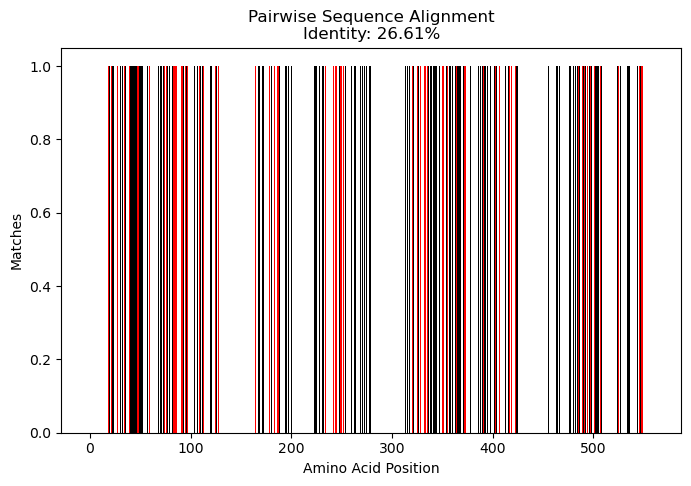


Alignment process completed.

Alignment Result:
MGLEALVPLAVIVAIFLLLVDLMHRRQRWAARYPPGPLPLPGLGNLLHVDFQNTPYCFDQLRRRF
  ...||.|.......|||  ...|........||||.|||..||.|.............|....
--MDSLVVLVLCLSCLLLL--SLWRQSSGRGKLPPGPTPLPVIGNILQIGIKDISKSLTNLSKVY 
GDVFSLQLAWTPVVVLNGLAAVREALVTHGEDTADRPPVPITQIL--GFGPRSQGVFLARYGPAW
|.||.|.....|.|||.|..||.|||...||....|...|.....  |||      .....|..|
GPVFTLYFGLKPIVVLHGYEAVKEALIDLGEEFSGRGIFPLAERANRGFG------IVFSNGKKW 
REQRRFSVSTLRNLGLGKKSLEQWVTEEAACLCAAFANHSGRPFRPNGLLDKAVSNVIASLTCGR
.|.||||..||||.|.||.|.|..|.|||.||..........|..|...|..|..|||.|.....
KEIRRFSLMTLRNFGMGKRSIEDRVQEEARCLVEELRKTKASPCDPTFILGCAPCNVICSIIFHK 
RFEYDDPRFLRLLDLAQEGLKE-ESGFLREVLNAVPVLLHIPALAGKVLR---FQKAFLTQLDEL
||.|.|..||.|.....|..|. .|.......|..|.....|....|.|.   |.|....   |.
RFDYKDQQFLNLMEKLNENIKILSSPWIQICNNFSPIIDYFPGTHNKLLKNVAFMKSYIL---EK 
LTEHRMTWDPAQPPRDLTEAFLAEMEKAKGNPESSFNDENLRIVVADLFSAGMVTTSTTLAWGLL
..||....| ...|.|....||..|||.|.|..|.|..|.|.....|||.||..||||||...||
VKEHQESMD-MNNPQDFIDCFLM

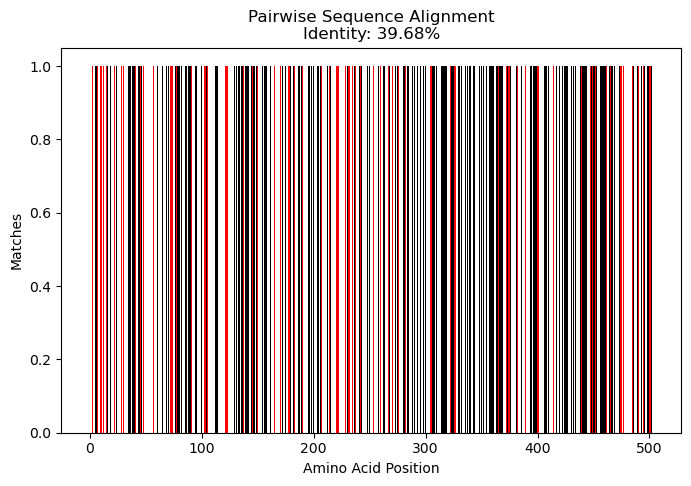


Alignment process completed.


In [4]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
import matplotlib.pyplot as plt
 
#Protein sequences were collected in a single list and operations were continued on this list
only_seq =[]
for seq_record in sequences:
    only_seq.append(seq_record.seq)
    
#Pairwise alignment was performed with the 3 protein sequences obtained
for i in range(0,len(only_seq)): 
    for j in range(i+1,len(only_seq)):
        sequence1 = only_seq[i]
        sequence2 = only_seq[j]
        ids = UniProt_IDs[i]
        ids2 = UniProt_IDs[j]
        use_matrix = "BLOSUM62"#The matrix used is BLOSUM62, but it can also be tried with other matrix parameters
        matrix = substitution_matrices.load(use_matrix)
        gap_open_penalty = -10
        gap_extend_penalty = -0.5
        #Implemented globalds for alignment
        alignments = pairwise2.align.globalds(
        sequence1, sequence2, matrix, gap_open_penalty, gap_extend_penalty, penalize_end_gaps=(False, False))
       
        best_alignment = alignments[0] #The one with the highest score from the alignment results was selected

        print("\nAlignment Result:")
        formatted_alignment = pairwise2.format_alignment(*best_alignment).split('\n')
        #The function was defined to visualize the sequences in an orderly and neat manner. 
        def split_string(input_string, chunk_size):
            return [input_string[i:i + chunk_size] for i in range(0, len(input_string), chunk_size)]
        
        s1 = split_string(formatted_alignment[0], 65)
        cursors = split_string(formatted_alignment[1], 65)
        s2 = split_string(formatted_alignment[2], 65)
        for c in range(0,len(s1)):
            print(f"{s1[c]}\n{cursors[c]}\n{s2[c]} ")

        #Calculating and printing the information obtained from the sequence alignment results
        aligned_seq1,aligned_seq2,score, start, end = best_alignment
        matches = sum(a == b for a, b in zip(aligned_seq1, aligned_seq2))
        mismatches = sum(a != b for a, b in zip(aligned_seq1, aligned_seq2))
        gaps = aligned_seq1.count("-") + aligned_seq2.count("-")
        identity_percentage = (matches/end)*100 
        #Counting amino acids that do not match during alignment but are in the same amino acid group (similar)
        sum_similarity = 0
        aa_groups = [["R","H","K"],["D","E"],["S","T","N","Q","Y","C"],["A","G","V","I","L","M","F","W","P"]]
        for x in range(0,len(aa_groups)):
            s = sum(a != b and a in aa_groups[x] and b in aa_groups[x]  for a,b in zip (aligned_seq1, aligned_seq2))
            sum_similarity += s
        similarity_percentage = ((sum_similarity/end)*100)
        #Presentation of all information obtained
        print("\nAlignment Details:")
        print(f"\nAlignment between {ids} and {ids2}:")
        print(f"Matrix: {use_matrix}")
        print(f"Gap penalty: {-1*gap_open_penalty}")
        print(f"Extend penalty: {-1*gap_extend_penalty}")
        print(f"Score: {score}")
        print(f"Length:{end} ")
        print(f"Matches: {matches}")
        print(f"Similar: {sum_similarity}")
        print(f"Mismatches: {mismatches-(sum_similarity+gaps)}") 
        print(f"Gaps: {gaps}")
        print(f"\nIdentity:{matches}/{end}\nIdentity Percentage: {identity_percentage}%")
        print(f"Similarity:{sum_similarity}/{end}\nSimilarity Percentage:{similarity_percentage}%")
       
        #Visualize alignment results
        import matplotlib.pyplot as plt

        plt.figure(figsize=(8, 5))
        #Representation of matching amino acids
        plt.bar(range(len(aligned_seq1)), [1 if a == b else 0 for a, b in zip(aligned_seq1, aligned_seq2)], color='black') 
        #Representation of amino acids that are similar
        plt.bar(range(len(aligned_seq1)), [1 if a != b and a in aa_groups[x] and b in aa_groups[x]  else 0 for a,b in zip (aligned_seq1, aligned_seq2)],color="red")
        
        plt.title(f"Pairwise Sequence Alignment\nIdentity: {identity_percentage:.2f}%")
        plt.xlabel("Amino Acid Position")
        plt.ylabel("Matches")
        plt.show()
    
        print("\nAlignment process completed.") 

The 3 protein sequences were aligned with each other using the pairwise2 method. BLOSUM62 matrix was used in this study. The gap open penalty was 10 and the gap extend penalty was 0.5. Some calculations were made with the information obtained from the alignment results.
There are different alignment options for the pairwise2 module. In this module, code is created by adding 2 characters indicating the names of the alignment functions (global or local) and the parameters they receive. In this study, the global alignment type was selected and ds was selected as the parameter. d means the score of the character pair is returned, s means the same opening and extension interval penalty is used for both sequences(1).

Firstly, matching amino acids, mismatching amino acids and gaps were counted. Then, the amino acids were separated according to their groups and the pairing situations of different amino acids from the same groups were counted and this was described as similarity. amino acids are nonpolar (A,G,V,I,L,M,F,W,P) polar,(S,T,N,Q,Y,C) positively charged(R,H,K) and negatively charged(D, E) it can be examined in 4 separate groups as (2).

Finally, a chart was created to visually display matching and similar amino acids. In this graph, it is stated at which position of the amino acid it is match and at which position it is similar. We can say that the more red and black colors we see when interpreting the graphics, the higher the relationship between the two series. Looking at the graphs and the alignment scores obtained, it is observed that the results support each other. As a result of the alignment, it was observed that the two proteins with the most similarity and identity to each other were P10635 and P11712.

## REFERENCES
1-https://biopython.org/docs/1.75/api/Bio.pairwise2.html 

2-Reece, Jane B., and Neil A. Campbell. Campbell Biology. Benjamin Cummings, 2011.
